## EDA on Reddit Posts.
EDA or Exploratory Data Analysis is an another important step in Machine Learning. Doing EDA helps us understand data using plots and graphs and gives us a better intuition about the data.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
%matplotlib inline

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/clean_reddit_posts.csv')
print(f'df shape {df.shape}')

df shape (2817, 5)


In [0]:
df = df.loc[:, ['Clean_Title', 'Clean_Body', 'SubReddit']]
df.head()

,Clean_Title,Clean_Body,SubReddit
0,What things about React annoy you the most,Can be anything missing features boilerplate b...,reactjs
1,Tutorial Building a contacts manager using Vue...,missing,vuejs
2,Having trouble deciding what design pattern sh...,The structure of my project is the following A...,vuejs
3,Prettier rule for this,I use Prettier and the auto format on save opt...,reactjs
4,Conditional Rendering in Vue JS Beginner Tutorial,missing,vuejs


In [0]:
## target count ##
cnt_srs = df['SubReddit'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Sub Reddit Count',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
fig.show()

In [0]:
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Target distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
fig.show()

In [0]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

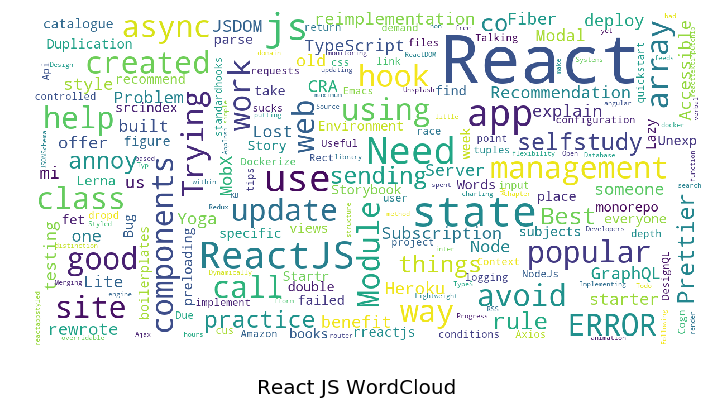

In [0]:
react_df = df[df['SubReddit'] == 'reactjs'].loc[:, 'Clean_Title']
show_wordcloud(react_df, title='React JS WordCloud')

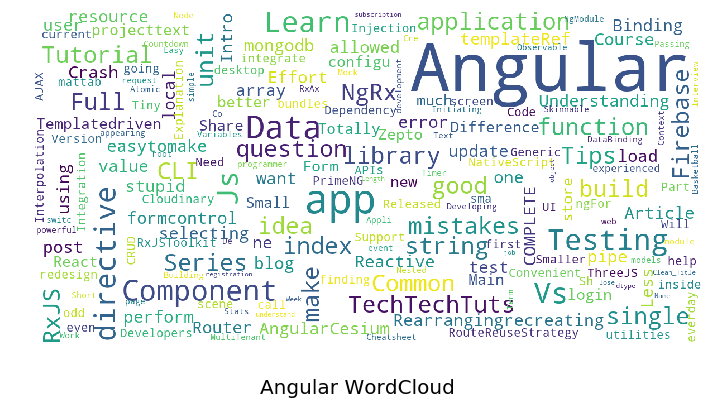

In [0]:
angular_df = df[df['SubReddit'] == 'angular'].loc[:, 'Clean_Title']
show_wordcloud(angular_df, title='Angular WordCloud')

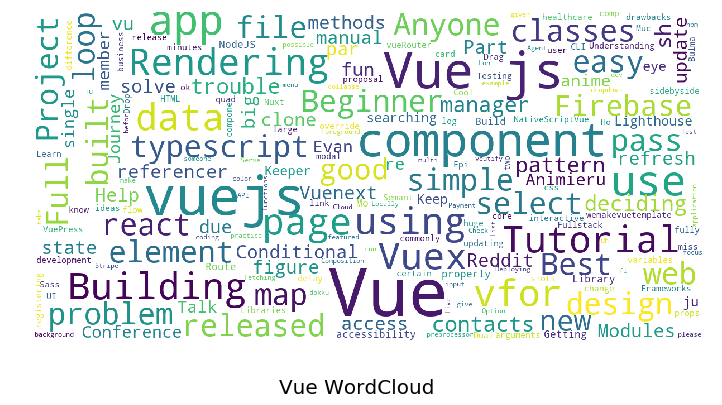

In [0]:
vue_df = df[df['SubReddit'] == 'vuejs'].loc[:, 'Clean_Title']
show_wordcloud(vue_df, title='Vue WordCloud')

In [0]:
from collections import defaultdict
from plotly.subplots import make_subplots
react_df = df[df["SubReddit"]=='reactjs']
angular_df = df[df["SubReddit"]=='angular']
vue_df = df[df["SubReddit"]=='vuejs']

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace
  
## Get the bar chart from react##
freq_dict = defaultdict(int)
for sent in react_df["Clean_Title"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from angular ##
freq_dict = defaultdict(int)
for sent in angular_df["Clean_Title"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from vue ##
freq_dict = defaultdict(int)
for sent in vue_df["Clean_Title"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating three subplots
fig = make_subplots(rows=1, cols=3, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of React posts", 
                                          "Frequent words of Angular posts",
                                         "Frequent words of Vue posts"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
fig.show()

In [0]:
## Get the bar chart from react##
freq_dict = defaultdict(int)
for sent in react_df["Clean_Title"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

## Get the bar chart from angular ##
freq_dict = defaultdict(int)
for sent in angular_df["Clean_Title"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

## Get the bar chart from vue ##
freq_dict = defaultdict(int)
for sent in vue_df["Clean_Title"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating three subplots
fig = make_subplots(rows=1, cols=3, vertical_spacing=0.04,
                          subplot_titles=["Frequent bigrams of React posts", 
                                          "Frequent bigrams of Angular posts",
                                         "Frequent bigrams of Vue posts"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
fig.show()